<a href="https://colab.research.google.com/github/srirs/BA-Sentiment-analysis/blob/main/BA_Reviews_Visulaization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')
#importing libraries for web scrapping
import requests
from bs4 import BeautifulSoup
import pandas as pd


Mounted at /content/drive


In [2]:
#fetching the url of british airways reviews from skytrax website
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
#selecting number of pages to be fetched
pages = 50
page_size = 100
#forming an empty list
reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

DATA PREPROCESSING

In [3]:
#creating a data frame from the review data avaolable
BA = pd.DataFrame()
BA["reviews"] = reviews
BA.head()

,reviews
0,✅ Trip Verified | My recent experience with B...
1,✅ Trip Verified | This is to express our disp...
2,✅ Trip Verified | I flew London to Malaga on ...
3,✅ Trip Verified | I arrived at the airport ab...
4,"✅ Trip Verified | Filthy plane, cabin staff o..."


In [4]:
#saving data into a csv file format in drive

BA.to_csv('/content/drive/My Drive/data/data.csv', index=False)
BA_review=pd.read_csv('/content/drive/My Drive/data/data.csv')
BA_review

,reviews
0,✅ Trip Verified | My recent experience with B...
1,✅ Trip Verified | This is to express our disp...
2,✅ Trip Verified | I flew London to Malaga on ...
3,✅ Trip Verified | I arrived at the airport ab...
4,"✅ Trip Verified | Filthy plane, cabin staff o..."
...,...
3632,Flight from Heathrow to Toronto. Booked emerge...
3633,LHR to HAM. Purser addresses all club passenge...
3634,My son who had worked for British Airways urge...
3635,London City-New York JFK via Shannon on A318 b...


In [5]:
# manipulating the data by deleting unwanted information
BA_review['reviews'] = BA_review['reviews'].str.replace('✅ Trip Verified','',regex=True)
BA_review['reviews'] = BA_review['reviews'].str.replace('Not Verified','',regex=True)
data = BA_review
print(data.head())



                                             reviews
0   |  My recent experience with British Airways ...
1   |  This is to express our displeasure and con...
2   |  I flew London to Malaga on 27 August in Cl...
3   |  I arrived at the airport about 2.5 hours b...
4   |  Filthy plane, cabin staff ok, appalling cu...


In [6]:
print(data.isnull().sum())

reviews    0
dtype: int64


SENTIMENT ANALYSIS

In [7]:
#importing libraries for data manipulation using sentiment analysis
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import string
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [8]:
stopword=set(stopwords.words('english'))
#defining a clean function
def clean(text):
  #Converting all text to lowercase.
  text = str(text).lower()
  #Removing text inside square brackets, which is often used to denote tags or URLs.
  #text = re.sub('\[.*?\]', '', text)
  # Removing URLs
  text = re.sub('https?://\S+|www\.\S+', '', text)
  #Removing HTML tags
  text = re.sub('<.*?>+', '', text)
  #Removing punctuation
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
  #Removing newlines
  text = re.sub('\n', '', text)
  #Removing words containing numbers
  text = re.sub('\w*\d\w*', '', text)
  #Removeing stop words, which are common words that don’t add much meaning to the text (e.g. “the”, “and”)
  text = [word for word in text.split(' ') if word not in stopword]
  #Joining the remaining words back together into a single string
  text=" ".join(text)
  #Applying stemming to the words in the text, which means reducing words to their base form (e.g., “running” becomes “run”)
  text = [stemmer.stem(word) for word in text.split(' ')]
  #Joining the stemmed words back together into a single string
  text=" ".join(text)
  # returning processed contents
  return text
data["reviews"] = data["reviews"].apply(clean)
print(data.head())

                                             reviews
0     recent experi british airway horrend utter ...
1     express displeasur concern regard flight it...
2     flew london malaga  august club europ stood...
3     arriv airport  hour takeoff time get check ...
4     filthi plane cabin staff ok appal custom se...


Word Cloud

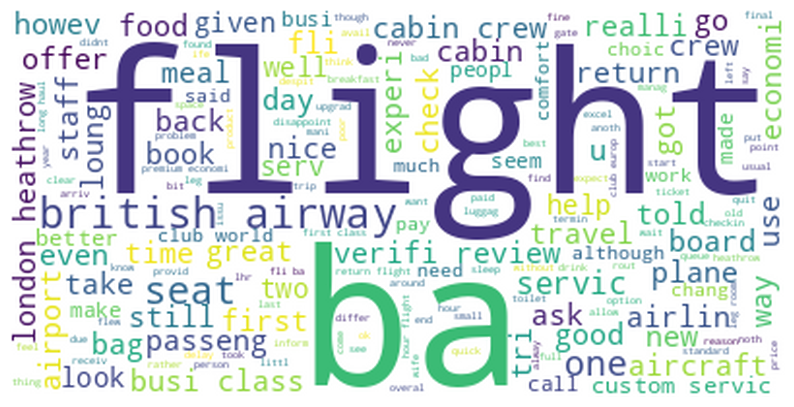

In [9]:
#type of words used by BA reviewers
text = " ".join(i for i in data.reviews)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(10,10))
plt.imshow(wordcloud, interpolation='spline36')
plt.axis("off")
plt.show()

In [10]:
nltk.download('vader_lexicon')
expression = SentimentIntensityAnalyzer()
data["Positive"] = [expression.polarity_scores(i)["pos"] for i in data["reviews"]]
data["Negative"] = [expression.polarity_scores(i)["neg"] for i in data["reviews"]]
data["Neutral"] = [expression.polarity_scores(i)["neu"] for i in data["reviews"]]
data = data[["reviews", "Positive", "Negative", "Neutral"]]
print(data)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


                                                reviews  Positive  Negative  \
0        recent experi british airway horrend utter ...     0.110     0.145   
1        express displeasur concern regard flight it...     0.091     0.083   
2        flew london malaga  august club europ stood...     0.017     0.095   
3        arriv airport  hour takeoff time get check ...     0.052     0.035   
4        filthi plane cabin staff ok appal custom se...     0.093     0.261   
...                                                 ...       ...       ...   
3632  flight heathrow toronto book emerg exit seat n...     0.220     0.000   
3633  lhr ham purser address club passeng name board...     0.269     0.000   
3634  son work british airway urg fli british airway...     0.124     0.023   
3635  london citynew york jfk via shannon  realli ni...     0.308     0.000   
3636  sinlhr   first class old aircraft  seat privat...     0.135     0.055   

      Neutral  
0       0.745  
1       0.826  
2  

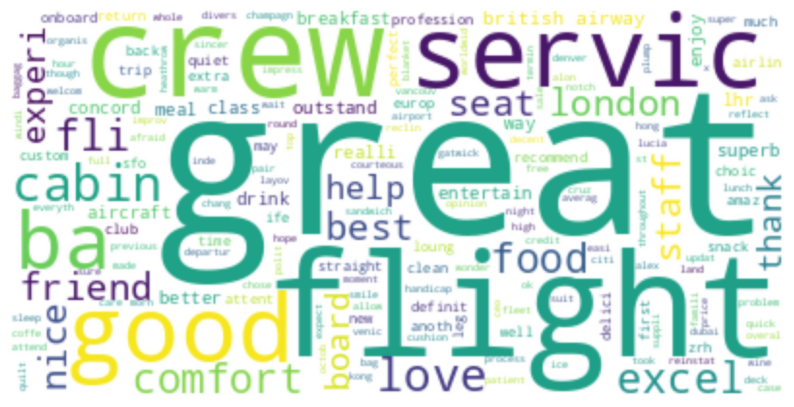

In [11]:
positive =' '.join([i for i in data['reviews'][data['Positive'] > data["Neutral"]]])

stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(10,10))
plt.imshow(wordcloud, interpolation='gaussian')
plt.axis("off")
plt.show()



<ipython-input-12-a68e5c6491a4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=data.corr(),annot=True)


<Axes: >

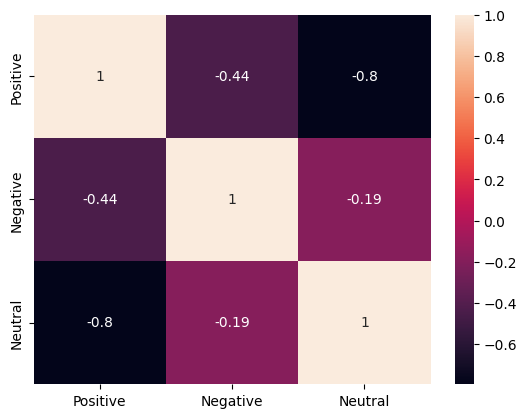

In [12]:
import seaborn as sns
sns.heatmap(data=data.corr(),annot=True)

<Axes: xlabel='Positive', ylabel='count'>

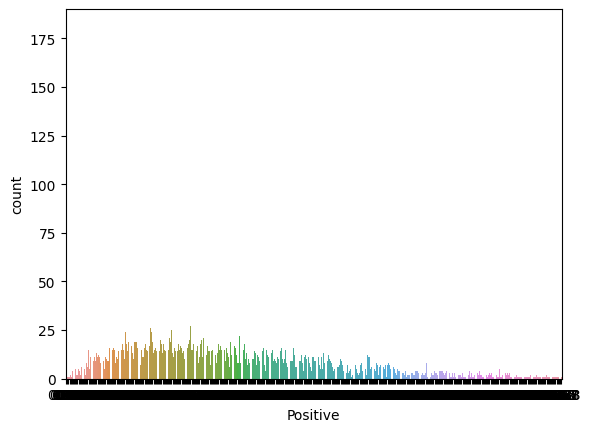

In [22]:
sns.countplot(data=data,x=data['Positive'])

<Axes: xlabel='Negative', ylabel='count'>

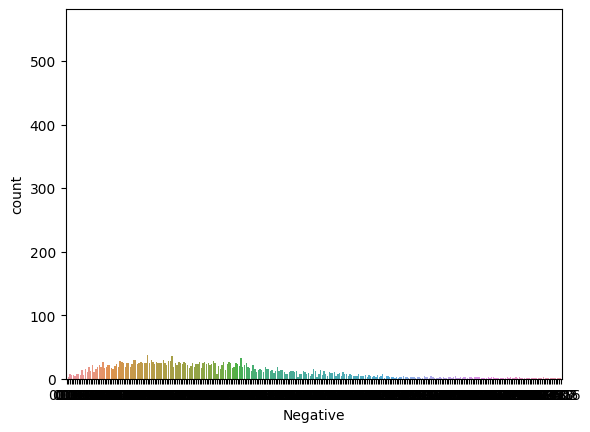

In [15]:
sns.countplot(data=data,x=data['Negative'])

<Axes: xlabel='Neutral', ylabel='count'>

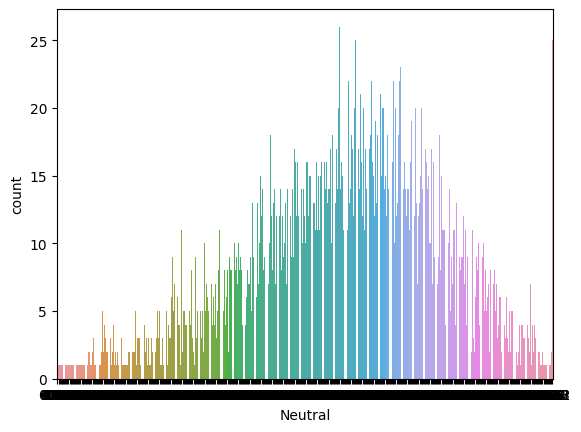

In [18]:
sns.countplot(data=data,x=data['Neutral'])

In [25]:
data[data["Positive"] >= 0.5].sort_values("Positive", ascending = False)[["reviews", "Positive"]].head(100)

,reviews,Positive
639,gatwick st lucia great servic flight thank ...,0.578
448,crew denver airport top notch impress custo...,0.568
2726,crew enthusiast help servic fast serv drink sn...,0.567
1131,dubai london heathrow love flight great ba ...,0.558
330,would like thank great servic handicap fami...,0.555
3463,flight zrh sfo via lhr leg zrh lhr regular no...,0.552
2844,fantast word go check great concord loung grea...,0.550
936,\rvenic london citi realli great experi bri...,0.545
541,hong kong london great airlin inde staff fr...,0.536
2894,lhratllhr may back may first way outstand ex...,0.528


In [27]:
data[data["Negative"] >= 0.4].sort_values("Negative", ascending = False)[["reviews", "Negative"]].head(10)

,reviews,Negative
677,flight london athen british airway one worst...,0.416
487,cancel month appli voucher find dont work...,0.405
756,mykono london flight delay wait depart time...,0.402


In [30]:
data[data["Neutral"] >= 0.5].sort_values("Neutral", ascending = False)[["reviews", "Neutral"]].head(200)

,reviews,Neutral
1206,food hour flight moscow heathrow fill roll ...,1.000
1141,earli morn flight heathrow keflavik flight ...,1.000
2978,substandard food busi class london mauritius a...,1.000
577,british airway comair johannesburg cape tow...,1.000
3375,flew ba lhrbos economi age flight minut lat...,1.000
...,...,...
1071,gatwick barcelona check effici friend help...,0.903
254,review ba book system flight today click w...,0.903
2693,flight home week break various part europ cab...,0.903
1284,flight new york jfk budapest via london hea...,0.902


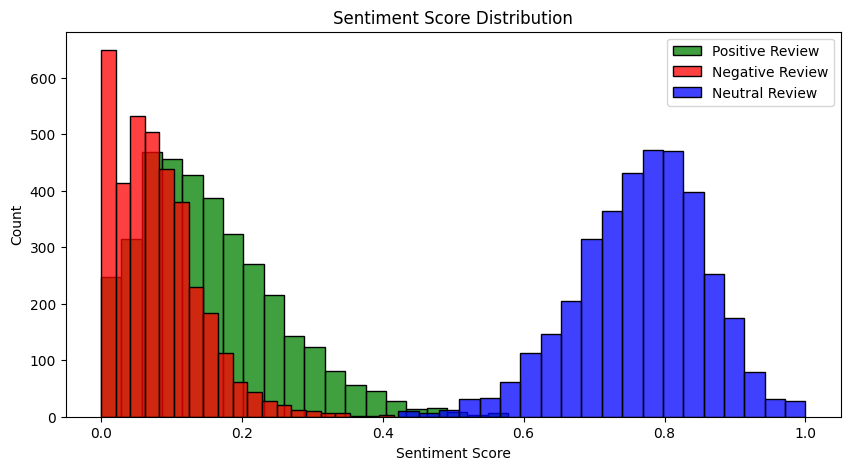

In [34]:
plt.figure(figsize=(10, 5))
sns.histplot(data=data, x='Positive', bins=20, color='green', label='Positive Review')
sns.histplot(data=data, x='Negative', bins=20, color='red', label='Negative Review')
sns.histplot(data=data, x='Neutral', bins=20, color='blue', label='Neutral Review')
plt.legend()
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.title('Sentiment Score Distribution')
plt.show()

In [41]:
weight_positive = 0.5
weight_negative = -0.5
weight_neutral = 0.0
data['Rating'] = (data['Positive'] * weight_positive + data['Negative'] * weight_negative + data['Neutral'] * weight_neutral).round(2)
print(data.head)

<bound method NDFrame.head of                                                 reviews  Positive  Negative  \
0        recent experi british airway horrend utter ...     0.110     0.145   
1        express displeasur concern regard flight it...     0.091     0.083   
2        flew london malaga  august club europ stood...     0.017     0.095   
3        arriv airport  hour takeoff time get check ...     0.052     0.035   
4        filthi plane cabin staff ok appal custom se...     0.093     0.261   
...                                                 ...       ...       ...   
3632  flight heathrow toronto book emerg exit seat n...     0.220     0.000   
3633  lhr ham purser address club passeng name board...     0.269     0.000   
3634  son work british airway urg fli british airway...     0.124     0.023   
3635  london citynew york jfk via shannon  realli ni...     0.308     0.000   
3636  sinlhr   first class old aircraft  seat privat...     0.135     0.055   

      Neutral  Rating

In [46]:
def categorize_overall_rating(row):
    if row['Rating'] >= 0.1:
        return 'GOOD'
    elif row['Rating'] <= -0.1:
        return 'BAD'
    else:
        return 'Ok'

# Apply the categorization function to create the "Overall Rating" column
data['Overall Rating'] = data.apply(categorize_overall_rating, axis=1)
print(data.head(100))


                                              reviews  Positive  Negative  \
0      recent experi british airway horrend utter ...     0.110     0.145   
1      express displeasur concern regard flight it...     0.091     0.083   
2      flew london malaga  august club europ stood...     0.017     0.095   
3      arriv airport  hour takeoff time get check ...     0.052     0.035   
4      filthi plane cabin staff ok appal custom se...     0.093     0.261   
..                                                ...       ...       ...   
95     book busi class ticket fiancé reschedul fli...     0.065     0.147   
96     never travel british airway spent  busi cla...     0.032     0.112   
97     alreadi portug contact today cancel return ...     0.089     0.152   
98     terribl avoid airlin it becom regular pract...     0.000     0.247   
99     despit gold member british airway staff hea...     0.217     0.035   

    Neutral  Rating Overall Rating  
0     0.745   -0.02             Ok  
1

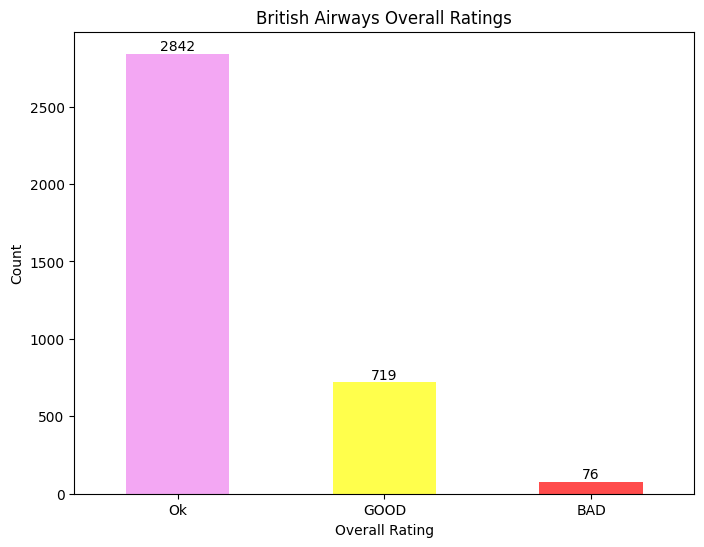

In [52]:
# Count the occurrences of each overall rating
rating_counts = data['Overall Rating'].value_counts()
# Create a bar plot
plt.figure(figsize=(8, 6))
rating_counts.plot(kind='bar', color=['violet', 'yellow', 'red'], alpha=0.7)
plt.title('British Airways Overall Ratings')
plt.xlabel('Overall Rating')
plt.ylabel('Count')
## Add data labels above the bars
for i, count in enumerate(rating_counts):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom')

plt.xticks(rotation=0)
plt.show()